### UPGMA Example

In [1]:
# if using Hooklog3
#%run Hooklog3.ipynb
#Hooklog = Hooklog3

# elis using NestedHooklog3
#%run NestedHooklog3.ipynb
#Hooklog = NestedHooklog3

# elis using FeatureHooklog3
#%run FeatureHooklog3.ipynb
#Hooklog = FeatureHooklog3

# elis using NestedFeatureHooklog3
#%run NestedFeatureHooklog3.ipynb
#Hooklog = NestedFeatureHooklog3

%run UPGMA.ipynb
%run distanceMatrixJaccard.ipynb

In [2]:
# input 
in_tag = "morstar"
in_orientation = "right"
in_upgma_threshold = 0.4
in_figsize_x = 6
in_figsize_y = 6

# auto-input
in_hl_list = None
in_hl_list_pkf = 'pickle/hl_list_'+ in_tag + '.pickle'
in_matrix = None
in_matrix_pkf = 'pickle/matrix_'+ in_tag + '.pickle'

# output
out_tag = in_tag
out_Z = None

# outfile
out_pdf = 'output/upgma_' + out_tag + '.pdf'
out_Z_pkf = 'pickle/Z_' + out_tag + '.pickle'

In [3]:
# Example
import os
import pickle

with open(in_hl_list_pkf, 'rb') as f:
    in_hl_list = pickle.load(f)
with open(in_matrix_pkf, 'rb') as f:
    in_matrix = pickle.load(f)

Z = UPGMA(in_matrix)
label_list = [hl.split('/')[-1][:6] + '-' + hl.split('_')[-1].split('.')[0] for hl in in_hl_list]

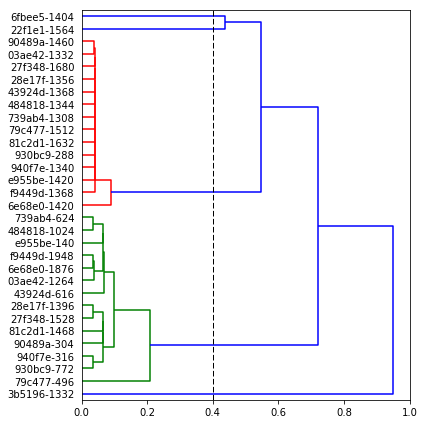

In [4]:
# Test

import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt
%matplotlib inline

(orig_x, orig_y) = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (in_figsize_x, in_figsize_y) #---input

#MIKE: Hack the height of tree, make sure we can see them
#for z in Z:
#    if z[2] < 0.002: z[2] = 0.002
P = sch.dendrogram(Z, color_threshold = in_upgma_threshold, labels = label_list, orientation = in_orientation)

if in_orientation == "left" or in_orientation == "right": # vertical linen
    plt.axvline(x=in_upgma_threshold, linewidth=1, color='black', linestyle='--')
    plt.xlim(0.0, 1.0)
else: # horizontal line
    plt.axhline(y=in_upgma_threshold, linewidth=1, color='black', linestyle='--')
    plt.ylim(0.0, 1.0)
locs, labels = plt.yticks()
plt.setp(labels, fontsize = 10)
plt.tight_layout()

plt.rcParams['figure.figsize'] = (orig_x, orig_y)
#plt.show()
plt.savefig(out_pdf, dpi=300)

In [5]:
# output
import pickle

out_tag = in_tag
out_Z = Z

with open(out_Z_pkf, 'wb') as o:
    pickle.dump(out_Z, o)

In [6]:
#print(P['ivl'])
#print(P['leaves'])
#print(P['color_list'])
#print(in_hl_list)